In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/wine.csv")
df.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
df.duplicated().sum()

0

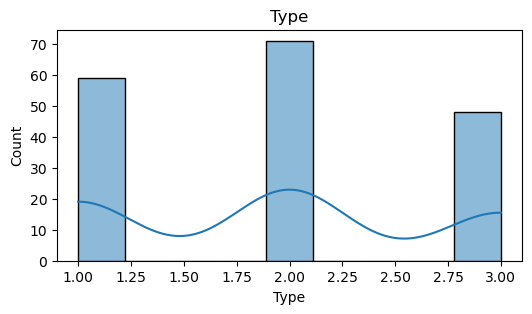

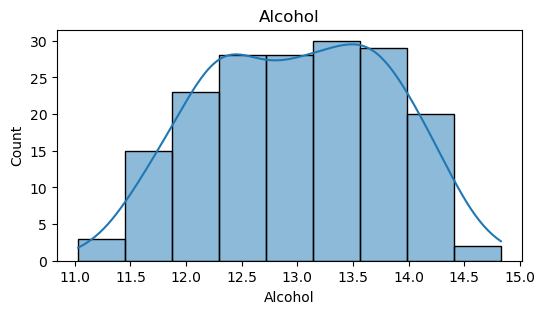

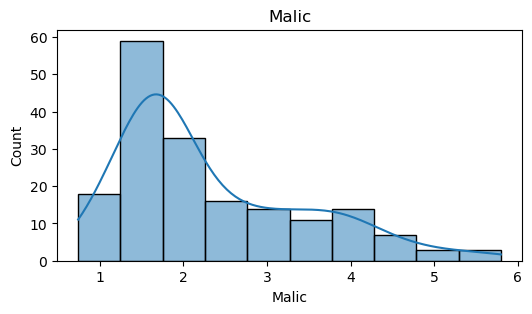

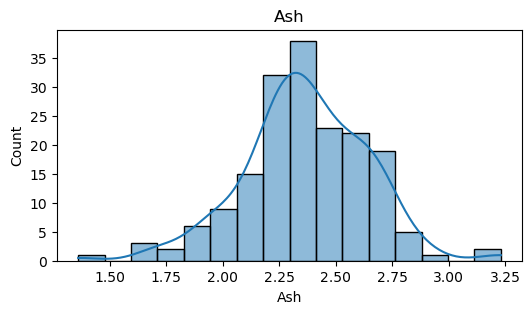

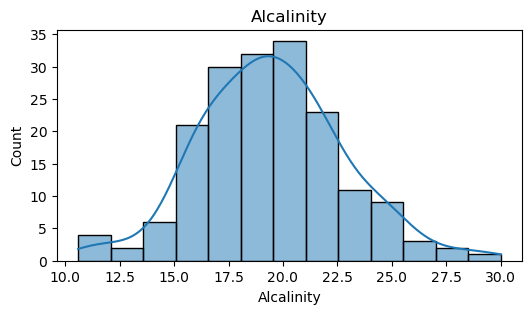

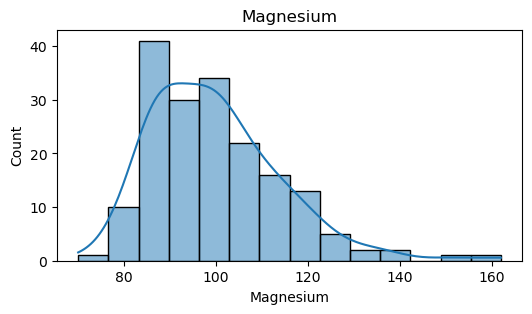

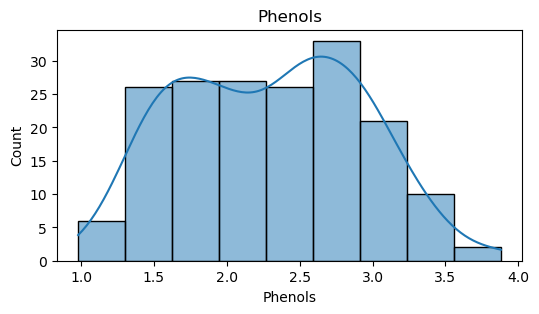

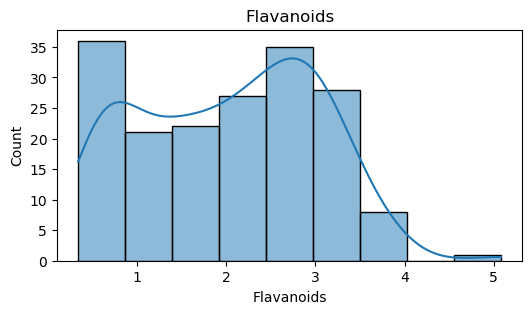

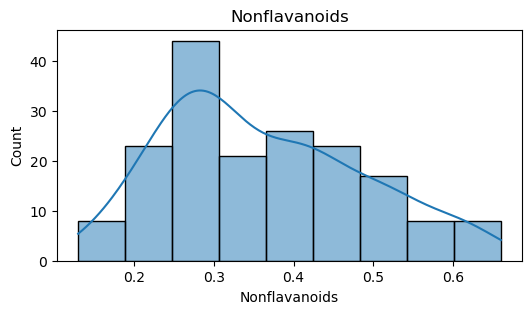

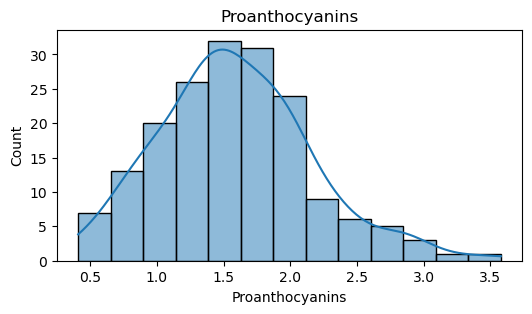

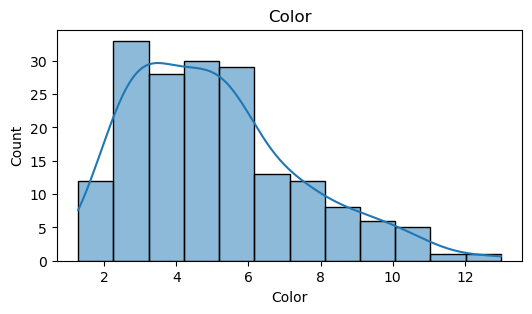

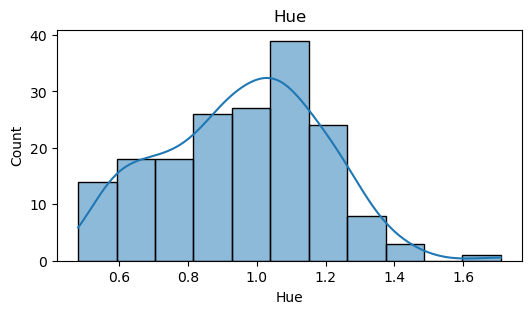

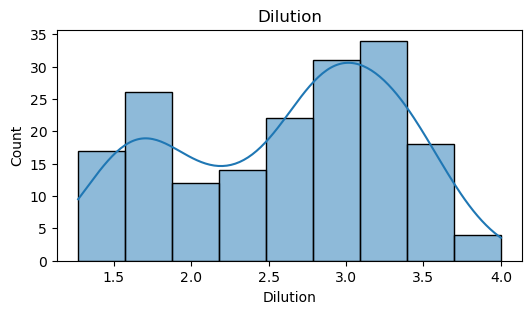

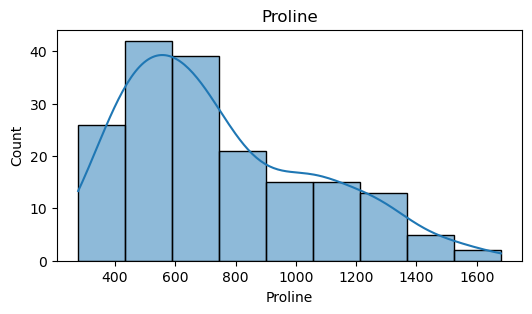

In [6]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    plt.title(label= i)
    sb.histplot(df[i], kde=True)
    plt.show()

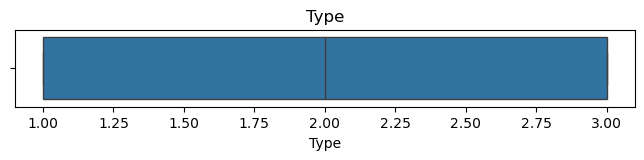

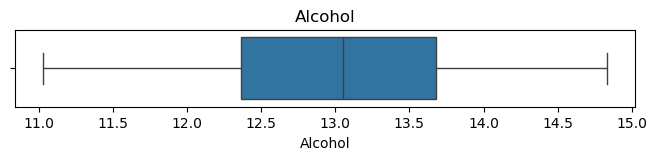

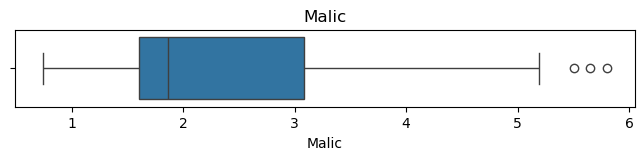

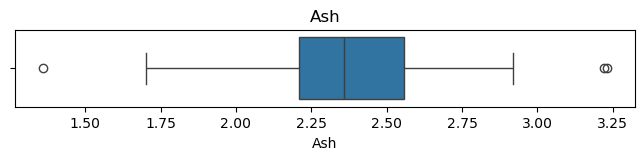

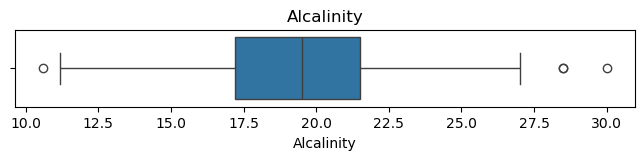

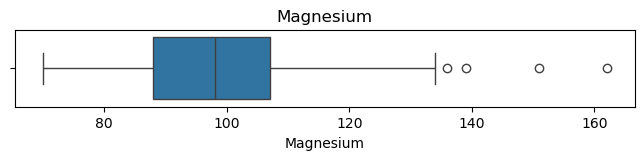

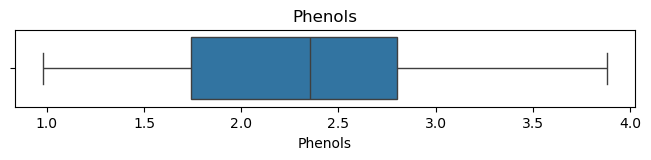

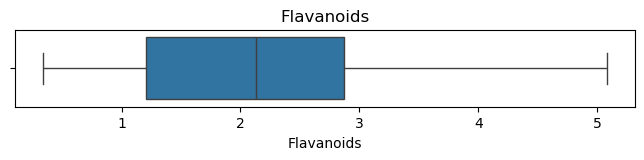

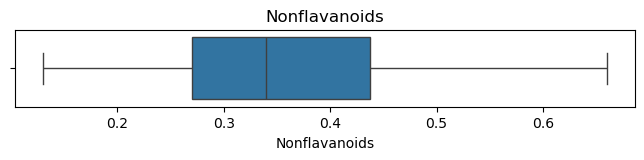

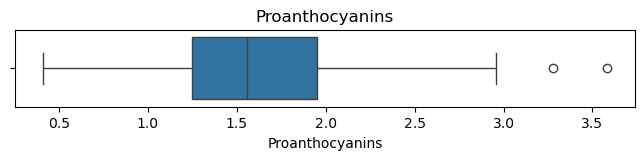

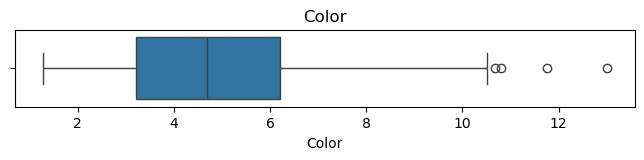

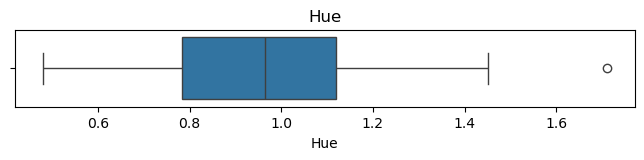

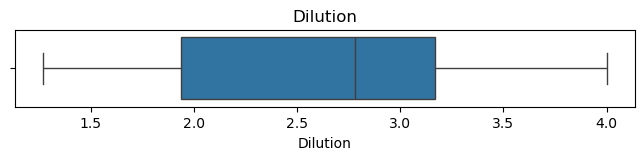

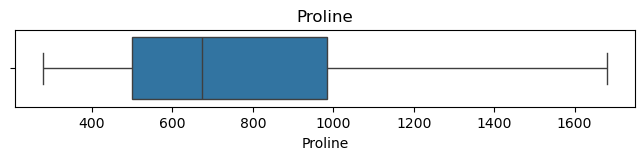

In [7]:
for i in df.columns:
    plt.figure(figsize=(8,1))
    plt.title(label= i)
    sb.boxplot(df[i], orient='h')
    plt.show()

In [8]:
outlier_variables = ['Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color', 'Hue']

In [9]:
def get_limits(var):
    Q1 = np.percentile(df[var],25)
    Q3 = np.percentile(df[var],75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)      
    return lower_limit, upper_limit

In [10]:
def check_outliers(var, LL, UL):
    #print(f'{var} :: {LL} :: {UL} >>>> {df[ (df[var]>UL) | (df[var]<LL) ].shape}')
    if df[ (df[var]>UL) | (df[var]<LL) ].shape[0] > 0 :   
        return True
    else:
        return False  

In [11]:
for var in outlier_variables: 
    LL, UL = get_limits(var)  
    flag = check_outliers(var, LL, UL)
    if flag == True: 
        df.loc[ df[var]>UL, var ] = UL  
        df.loc[ df[var]<LL, var ] = LL 

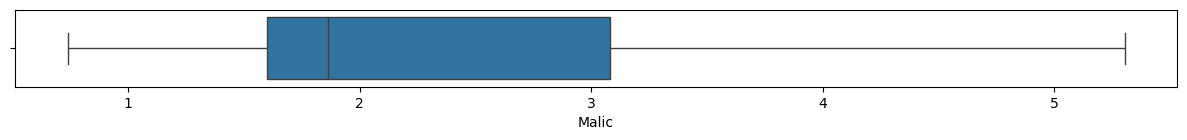

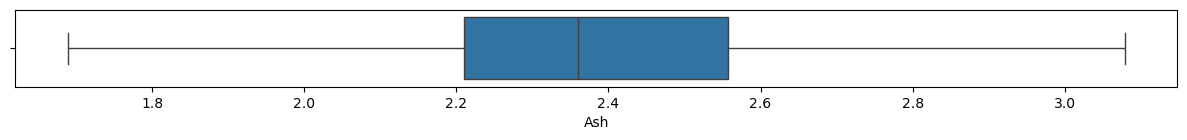

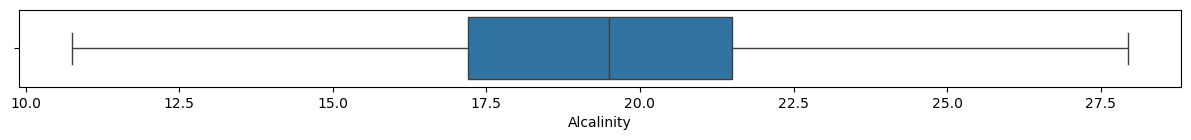

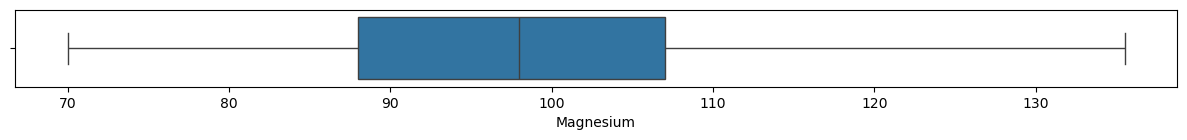

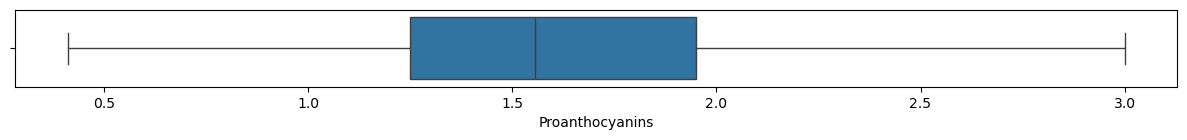

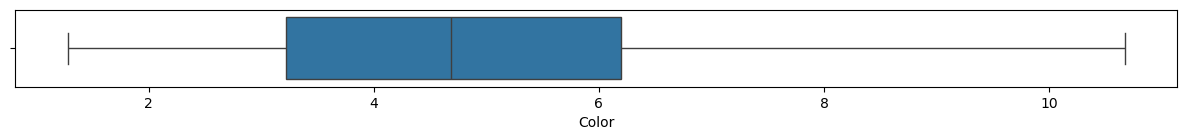

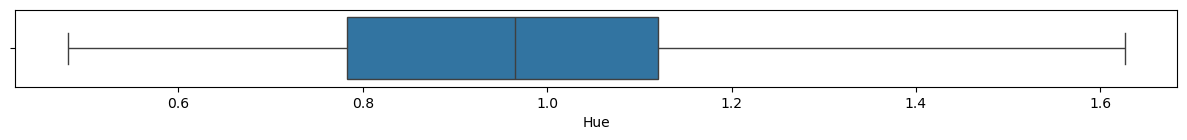

In [12]:
for i in outlier_variables:
    plt.figure(figsize=(15,1))
    sb.boxplot(df[i],orient='h')
    plt.show()

In [13]:
x = df.iloc[:,1:]
x.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

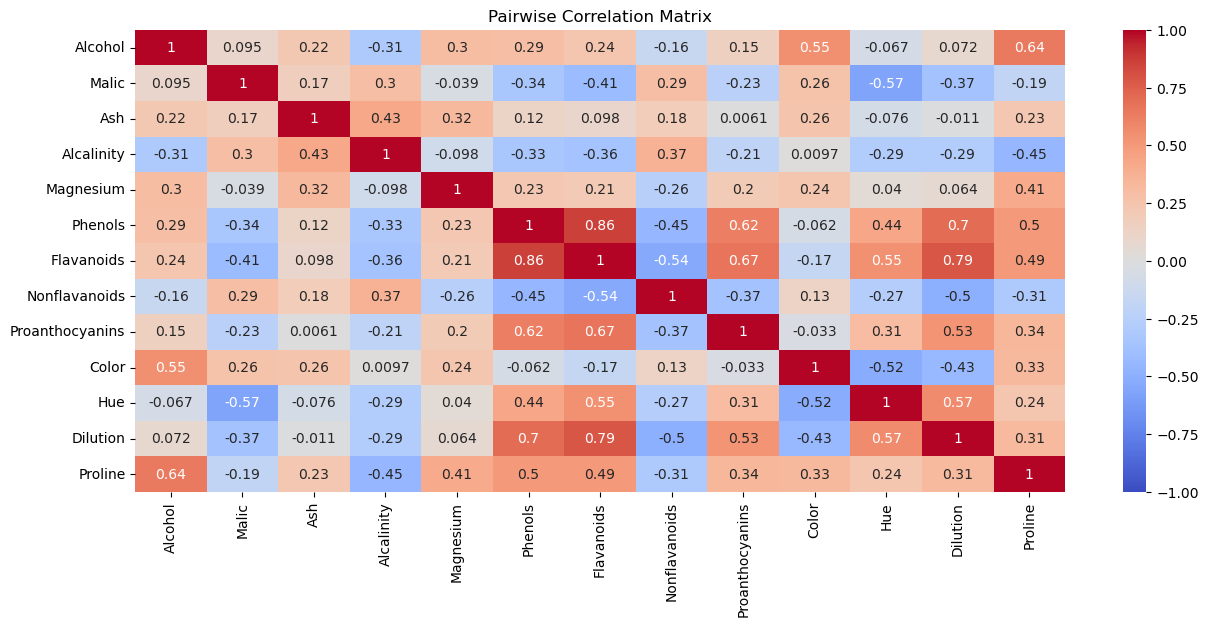

In [14]:
corr_matrix = x.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(15, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pairwise Correlation Matrix')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data)

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit_transform(scaled_data)
PC = pd.DataFrame(PC)

In [17]:
scores = []
pca_scores = []
for i in range(2,13,1):
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=i)
    col = 'K'+ str(i)
    pca_col = 'KPCA_' + str(i)
    df[col] = model.fit_predict(x)   
    df[pca_col] = model.fit_predict(PC)   
    scores.append(silhouette_score(x,df[col])) 
    pca_scores.append(silhouette_score(PC,df[pca_col])) 

In [61]:
np.mean(scores), np.mean(pca_scores)

(0.5466589922869778, 0.17794150900612474)

Here, the higher score of original dataset 0.547 means data point is more aligned with that PC.  
And PCA score 0.178 of PC dataset means that this component captures a moderate amount of total variance-useful but not dominant

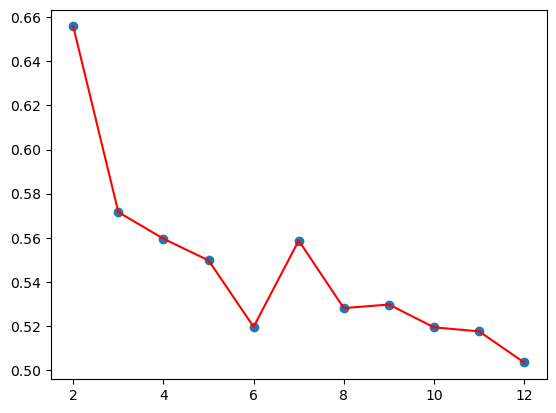

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x=range(2,13,1),y=scores)
plt.plot(range(2,13,1),scores,color='red')
plt.show()

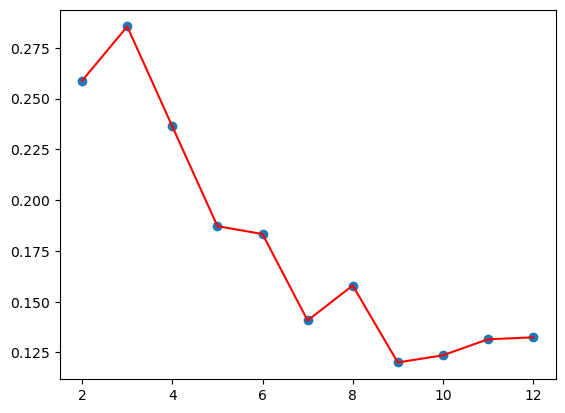

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x=range(2,13,1),y=pca_scores)
plt.plot(range(2,13,1),pca_scores,color='red')
plt.show()